In [1]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

In [2]:
np.set_printoptions(suppress=True)

In [3]:
# reload(h_env)

# Normal Game Play

In [14]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [15]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [11]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [16]:
info, env.get_info_agent_two()

({'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': -0.11766339645208586,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [17]:
env.close()

# Train Shooting

In [18]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [19]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [20]:
env.close()

# Train DEFENDING

In [21]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_DEFENSE)

In [22]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

0.0
-0.5488714158589414
-0.411463995837039
-0.3024408531549198
-0.21724449644020236
-0.13940081079051236
-0.09130856657340422
-0.14530043941546356
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0


In [23]:
env.close()

# Using discrete actions

In [24]:
import random

In [25]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [26]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [27]:
env.close()

# Hand-crafted Opponent

In [28]:
env = h_env.HockeyEnv()

In [29]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [30]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [31]:
np.mean(obs_buffer,axis=0)

array([-2.19305601, -0.04637131, -0.48742603, -0.49485877,  0.08973838,
       -1.20016691,  1.59267106, -0.10621016,  0.1418926 , -0.19915281,
       -0.56312151, -0.01187762,  0.24480294, -0.78879021,  9.02823342,
        0.94103362,  2.91666667,  0.        ])

In [32]:
np.std(obs_buffer,axis=0)

array([ 0.68767809,  0.0369244 ,  0.45582657,  6.04012251,  0.41587133,
        2.24431657,  0.83307669,  0.12779761,  0.07792899,  7.55278914,
        0.75905521,  0.79891766,  1.95509066,  0.99332601, 10.37144216,
       13.73707633,  4.94061962,  0.        ])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [33]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [34]:
import pylab as plt

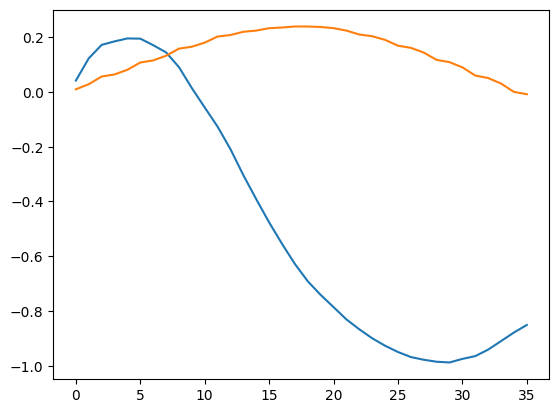

In [35]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

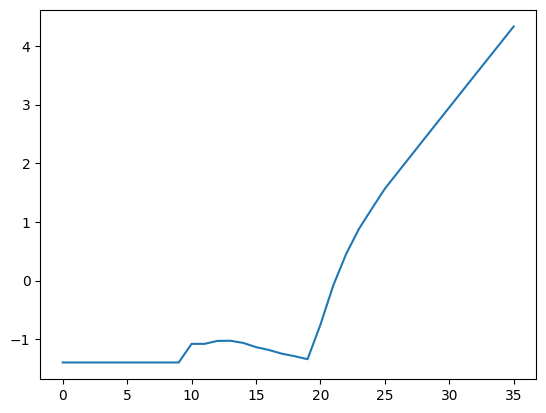

In [36]:
plt.plot(obs_buffer[:,12])

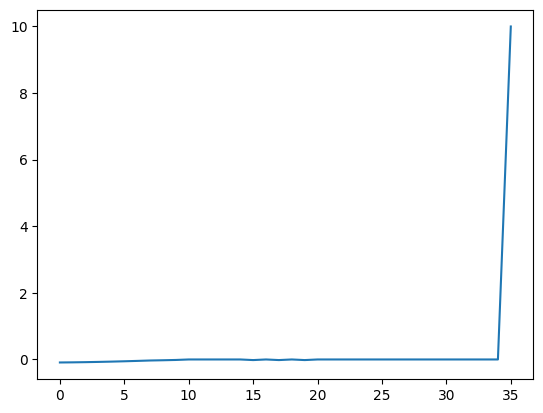

In [37]:
plt.plot(reward_buffer[:])

In [38]:
np.sum(reward_buffer)

np.float64(9.382971864376987)

In [39]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 1,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.002200400543212891},
 {'winner': -1,
  'reward_closeness_to_puck': -0.08888282522539094,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.002200400543212891},
 10.0,
 -10.08888282522539)

In [40]:
env.close()

# Human Opponent

In [41]:
env = h_env.HockeyEnv()

In [42]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [43]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [46]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [47]:
env.close()

# Check side consistency

In [48]:
env = h_env.HockeyEnv()

In [49]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [50]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [51]:
obs_buffer.shape

(150911, 18)

In [52]:
np.mean(obs_buffer,axis=0)

array([-2.9737481 , -0.00389052, -0.00098744, -0.06068974,  0.00053737,
        0.00684031,  2.96906086,  0.00154943, -0.0013995 ,  0.0559986 ,
       -0.00210782, -0.00475535, -0.0208698 , -0.0031277 ,  0.01032396,
        0.00961799,  1.10906428,  1.10767273])

In [53]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

array([-0.00506731,  0.01551133,  0.00046753, -0.00410606,  0.00597452,
        0.00438401,  0.00504177, -0.01575572, -0.00046775,  0.00408927,
       -0.00601043, -0.00440332,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00055923, -0.00055954])

In [54]:
winner_buffer

[-1,
 0,
 1,
 0,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 1,
 -1,
 1,
 0,
 -1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 0,
 0,
 1,
 0,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 0,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 0,
 0,
 1,
 -1,
 0,
 0,
 0,
 -1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 0,
 1,
 -1,
 0,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 0,
 0,
 0,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 1,
 -1,
 1,
 0,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 -1,
 1,
 -1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 -1,
 0,
 0,
 1,
 0,
 -1,
 1,
 0,
 1,
 0,
 -1,


In [55]:
np.mean(winner_buffer,axis=0)

np.float64(0.006)

In [56]:
np.std(winner_buffer,axis=0)

np.float64(0.7949616342943853)

In [57]:
np.sum(reward_buffer), np.sum(reward2_buffer)

(np.float64(-4360.242935355797), np.float64(-4367.869316511626))

In [ ]:
env.close()

: 